## Import libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data from file csv

In [58]:
data = pd.read_csv('Data/BonBanh.csv')
data

,Tên xe,Năm sản xuất,Tình trạng,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Màu ngoại thất,Màu nội thất,Dẫn động,Số chỗ ngồi,Giá xe
0,Xe Peugeot 2008 Active 1.2 AT,2022,Xe đã dùng,"30,000 Km",Lắp ráp trong nước,Crossover,Số tự động,Xăng 1.2 L,Đỏ,Đen,FWD - Dẫn động cầu trước,5 chỗ,679 Triệu
1,Xe Mercedes Benz C class C300 AMG,2014,Xe đã dùng,"90,000 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 3.0 L,Trắng,Đen,RFD - Dẫn động cầu sau,5 chỗ,499 Triệu
2,Xe Mercedes Benz E class E200 Exclusive,2022,Xe đã dùng,500 Km,Lắp ráp trong nước,Sedan,Số tự động,Xăng 2.0 L,Đen,Nâu,RFD - Dẫn động cầu sau,5 chỗ,2 Tỷ 229 Triệu
3,Xe Mercedes Benz C class C200 Avantgarde,2021,Xe đã dùng,80 Km,Lắp ráp trong nước,Sedan,Số tự động,Xăng 1.5 L,Xanh,Nâu,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 399 Triệu
4,Xe Mercedes Benz E class E200 Exclusive,2022,Xe đã dùng,"8,888 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 2.0 L,Trắng,Nâu,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 788 Triệu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,Xe Kia Morning LX 1.0 AT,2009,Xe đã dùng,"1,111 Km",Nhập khẩu,Hatchback,Số tự động,Xăng 1.0 L,Bạc,Kem,FWD - Dẫn động cầu trước,5 chỗ,158 Triệu
18359,Xe Hyundai Accent 1.4 MT,2018,Xe đã dùng,"80,000 Km",Lắp ráp trong nước,Sedan,Số tay,Xăng 1.4 L,Trắng,Kem,FWD - Dẫn động cầu trước,5 chỗ,328 Triệu
18360,Xe Toyota Vios G 1.5 CVT,2023,Xe mới,Xe mới,Lắp ráp trong nước,Sedan,Số tự động,Xăng 1.5 L,Trắng,Đen,FWD - Dẫn động cầu trước,5 chỗ,592 Triệu
18361,Xe Mitsubishi Attrage 1.2 CVT,2023,Xe mới,Xe mới,Nhập khẩu,Sedan,Số tự động,Xăng 1.2 L,Xám,Đen,FWD - Dẫn động cầu trước,5 chỗ,465 Triệu


## Preprocessing

#### Change value *Xe mới* in into *0 km* and remove *km* in other values in **Số km đã đi** column

In [59]:
data['Số km đã đi'] = data['Số km đã đi'].replace('Xe mới', '0 Km')
data['Số km đã đi'] = data['Số km đã đi'].str.replace('Km', '')
def change_to_int(so_km):
    km = 0
    so_km = [int(x) for x in so_km.split(',')]
    n = len(so_km)
    for i in range(n):
        km += 1000**(n-i-1)*so_km[i] 
    return km
data['Số km đã đi'] = data['Số km đã đi'].apply(change_to_int)
data['Số km đã đi'] = data['Số km đã đi'].astype('int64')

#### Split **Tên xe** column into **Hãng xe** column and **Dòng xe** column

In [60]:
data['Tên xe'] = data['Tên xe'].str.replace('Xe ', '')
check =  lambda x : ' '.join(x.split()[:1]) if x.split()[0] != "Mercedes" else ' '.join(x.split()[:2])
cartype = data['Tên xe'].apply(check)
data['Hãng xe'] = cartype

In [61]:
#remove 2 first words from Tên xe column if the first word is not Merceides else take 1 word
data['Tên xe'] = data['Tên xe'].apply(lambda x : ' '.join(x.split()[1:]) if x.split()[0] != "Mercedes" else ' '.join(x.split()[2:]))

In [62]:
classcheck = lambda x: ' ' if x == '' else (' '.join(x.split()[:2]) if (x.split()[0] == "4" or x.split()[0]=="Range Rover" or x.split()[0]=="Lux" or x.split()[0]== "Range" ) else ' '.join(x.split()[:1]))
series = data['Tên xe'].apply(classcheck)
data['Series'] = series

In [63]:
data = data.drop('Tên xe', axis=1)

#### Split **Động cơ** column into **Dung tích** column and **Loại nhiên liệu** column

In [64]:
data['Dung tich'] = data['Động cơ'].str.extract(r'(\d\.\d)')
data['Loại nhiên liệu'] = data['Động cơ'].str.extract(r'(Xăng|Dầu|Hybrid|Điện)')

In [65]:
data['Dung tich'] = data['Dung tich'].fillna(0)
data = data.drop('Động cơ', axis=1)

#### Remove *Chỗ* in all values in **Số chỗ ngồi** column

In [66]:
#remove "cho" from So cho ngoi column
data['Số chỗ ngồi'] = data['Số chỗ ngồi'].str.replace('chỗ', '')
data['Số chỗ ngồi'] = data['Số chỗ ngồi'].astype('int64')

#### Take the first word in all value **Dẫn động**

In [67]:
data['Dẫn động'] = data['Dẫn động'].apply(lambda x: x.split()[0])

#### Change value in **Giá xe** column into *Triệu* unit

In [68]:
def convert_price(price):
    price = price.split(" ")[:-1]
    if len(price) == 3:
        return int(price[0])*1000 + int(price[2])
    return int(price[0])
data['Giá xe'] = data['Giá xe'].apply(convert_price)

## Exploratory and Data Analynist

In [69]:
data.nunique()

Năm sản xuất         35
Tình trạng            2
Số km đã đi        1054
Xuất xứ               2
Kiểu dáng            10
Hộp số                4
Màu ngoại thất       18
Màu nội thất         17
Dẫn động              5
Số chỗ ngồi          19
Giá xe             1782
Hãng xe              68
Series              398
Dung tich            54
Loại nhiên liệu       4
dtype: int64

In [70]:
data.dtypes

Năm sản xuất        int64
Tình trạng         object
Số km đã đi         int64
Xuất xứ            object
Kiểu dáng          object
Hộp số             object
Màu ngoại thất     object
Màu nội thất       object
Dẫn động           object
Số chỗ ngồi         int64
Giá xe              int64
Hãng xe            object
Series             object
Dung tich          object
Loại nhiên liệu    object
dtype: object

In [71]:
discrete_numerical_cols = []
continuous_numerical_cols = []
categorical_cols = []
for col in data.columns:
    if len(data[col].unique()) < 6:
        categorical_cols.append(col)
    else:
        if data[col].dtypes == 'int64':
            continuous_numerical_cols.append(col)
        else:
            discrete_numerical_cols.append(col)
print(discrete_numerical_cols)
print(continuous_numerical_cols)
print(categorical_cols)

['Kiểu dáng', 'Màu ngoại thất', 'Màu nội thất', 'Hãng xe', 'Series', 'Dung tich']
['Năm sản xuất', 'Số km đã đi', 'Số chỗ ngồi', 'Giá xe']
['Tình trạng', 'Xuất xứ', 'Hộp số', 'Dẫn động', 'Loại nhiên liệu']


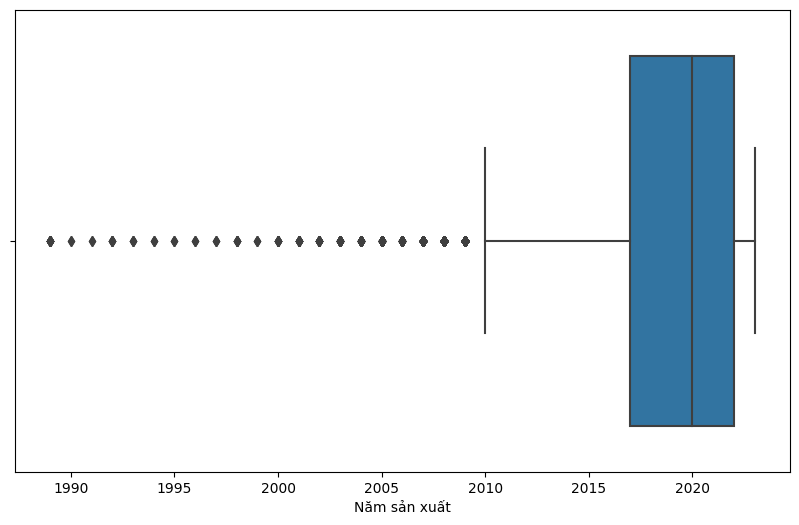

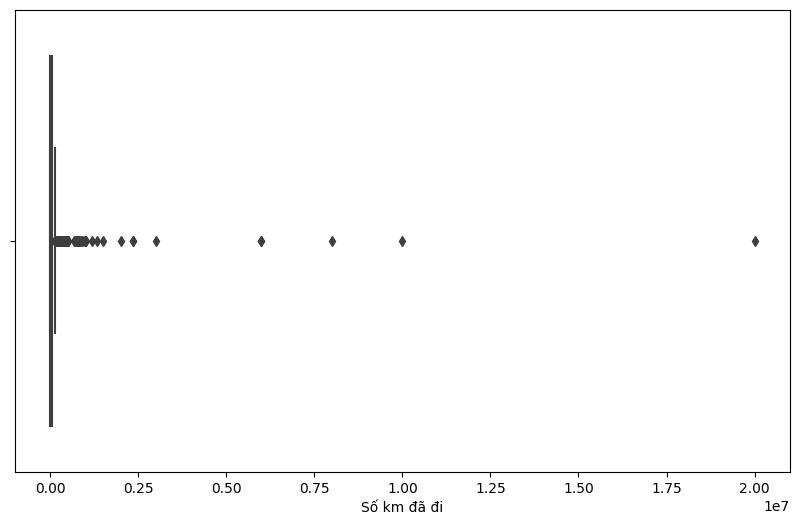

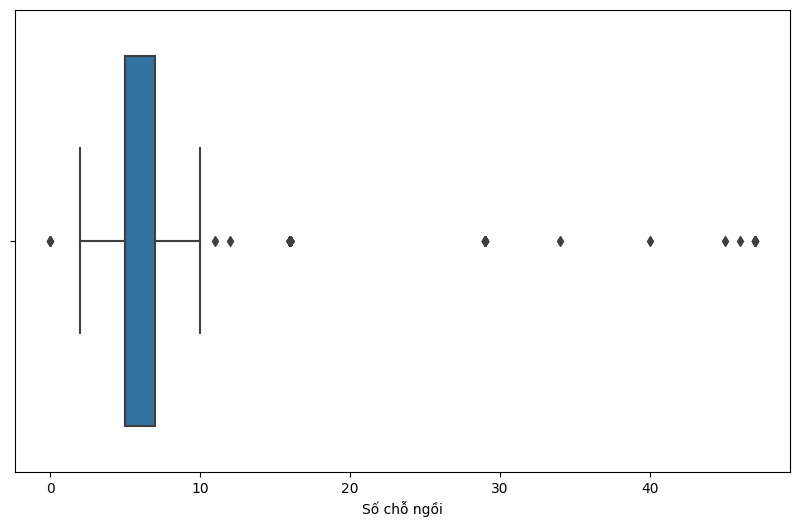

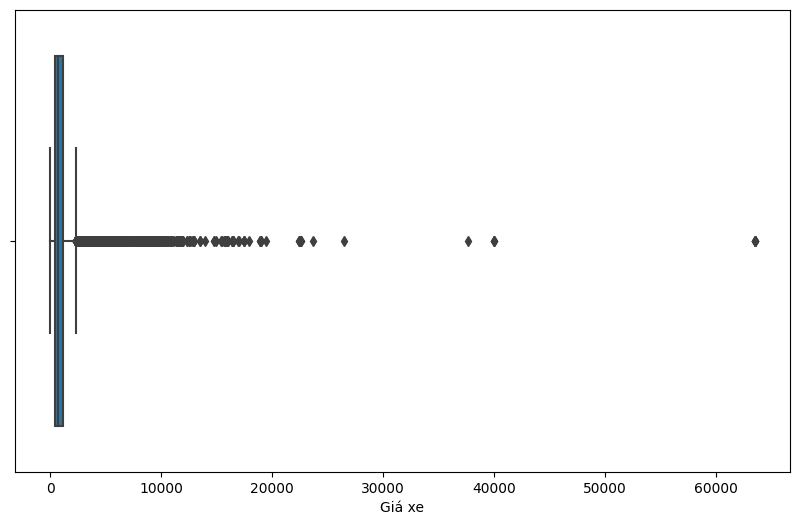

In [72]:
for col in continuous_numerical_cols: 
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data[col])

## Data Vizualization

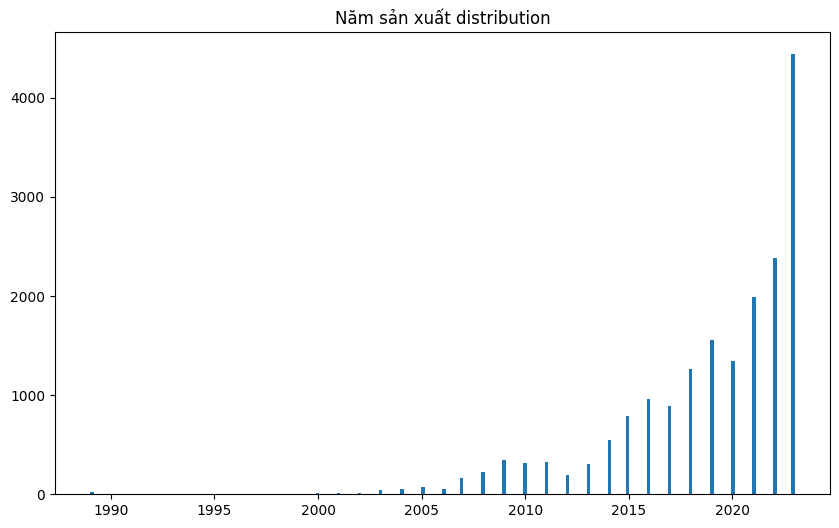

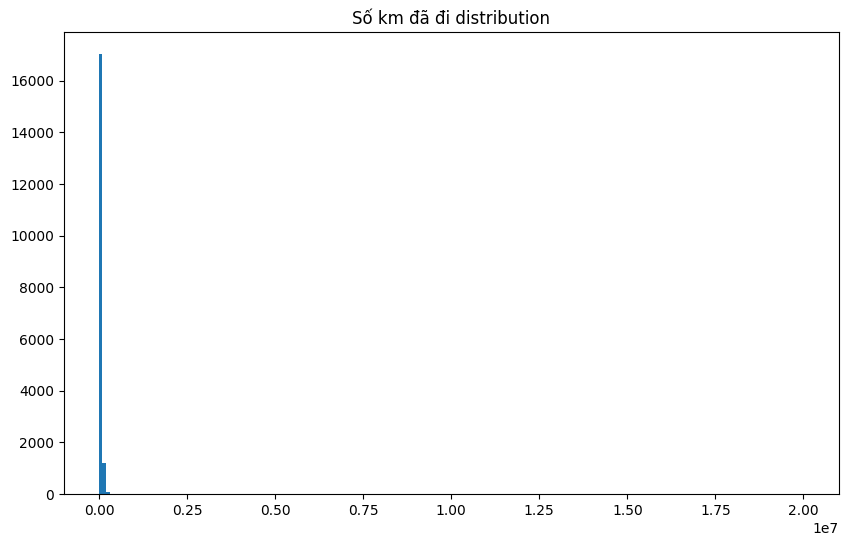

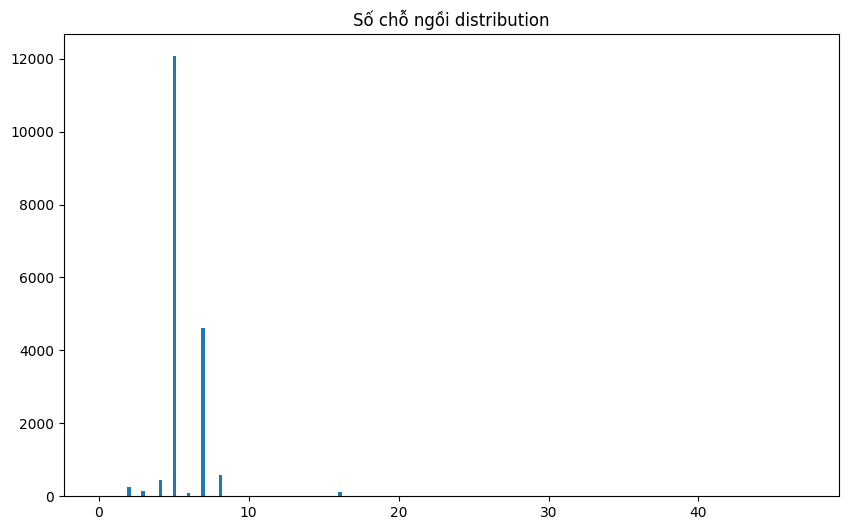

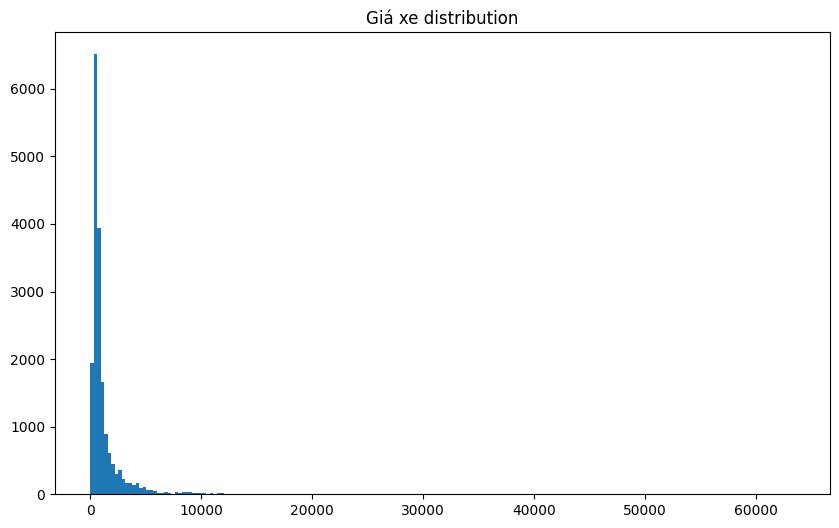

In [73]:
for col in continuous_numerical_cols: 
    plt.figure(figsize=(10,6))
    plt.title(col + ' distribution')
    plt.hist(data[col], bins=200)
    plt.show()